# Fiber models - Firing rate analysis

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import math
from PySONIC.core import PulsedProtocol
from PySONIC.utils import logger
from PySONIC.postpro import detectSpikes
from MorphoSONIC.core import SennFiber, UnmyelinatedFiber, GaussianAcousticSource
from MorphoSONIC.plt import SectionCompTimeSeries
logger.setLevel(logging.WARNING)

In [13]:
def FiringRate(fiber, source, pp):
    data, meta= fiber.simulate(source, pp) 
    ispikes_end = detectSpikes(data[fiber.nodeIDs[-1]])[0]
    if np.size(ispikes_end) in [0,1]:
        fr=np.nan
    else:
        times = data[fiber.nodeIDs[-1]]['t']
        tspike=np.zeros(len(ispikes_end))
        for m, ispike in enumerate(ispikes_end):
            tspike[m]=times[ispike]
        deltat=np.diff(tspike)
        deltat_mean=np.mean(deltat)
        #deltat_mean=np.mean(deltat[1:])
        fr = np.divide(1,deltat_mean)
    return fr

## Firing rate analysis - Acoustic stimulation


### Firing rate / PRF - myelinated and unmyelinated fibers 

In [ ]:
logger.setLevel(logging.INFO)

#Unmyelinated fiber
fiberD = 0.8e-6 
a=32e-9
fs=0.8 
fiber = UnmyelinatedFiber(fiberD, a=a, fs=fs)
ton_unmyel = [8e-4, 8e-3, 8e-2]
toffset = 3e-3 
A_unmyel = 300e3
Fdrive=500e3
source = GaussianAcousticSource(0, fiber.length / 10., Fdrive, A_unmyel)

for ton in ton_unmyel:
    prf_max = np.divide(0.99,ton)
    prf_min = np.divide(0.01,ton)
    prf_unmyel = np.logspace(max(1, np.log10(prf_min)), np.log10(prf_max), 30) 
    fr = np.zeros(len(prf_unmyel))
    for n, prf in enumerate(prf_unmyel):
        dc = ton * prf   
        tstim = np.divide(9,prf) + ton  
        pp = PulsedProtocol(tstim, toffset, PRF=prf, DC=dc)
        fr[n]= FiringRate(fiber, source, pp)
    np.savetxt(f'fr_unmyel_ton{(ton*1e3):.1f}ms.txt', fr)

 28/09/2020 12:48:34: UnmyelinatedFiber(fiberD = 800.0 nm, 229 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=500.0um, f=500kHz, A=300.00kPa), tstim = 721ms, toffset = 3ms, PRF = 12.50Hz, DC = 1.0%
 28/09/2020 12:54:57: UnmyelinatedFiber(fiberD = 800.0 nm, 229 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=500.0um, f=500kHz, A=300.00kPa), tstim = 615ms, toffset = 3ms, PRF = 14.65Hz, DC = 1.2%
IDA initialization failure, weighted norm of residual=3.35311e+07
 28/09/2020 13:00:19: UnmyelinatedFiber(fiberD = 800.0 nm, 229 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=500.0um, f=500kHz, A=300.00kPa), tstim = 525ms, toffset = 3ms, PRF = 17.16Hz, DC = 1.4%
IDA initialization failure, weighted norm of residual=12710.8
 28/09/2020 13:04:56: UnmyelinatedFiber(fiberD = 800.0 nm, 229 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=500.0um, f=500kHz, A=300.00kPa), tstim = 448

In [16]:
logger.setLevel(logging.WARNING)

#Myelinated fiber
fiberD = 10e-6 
nnodes=21
a=32e-9
fs=0.8 
fiber = SennFiber(fiberD, nnodes, a=a, fs=fs)
#ton_myel = [76e-7, 76e-6, 76e-5]
ton_myel = [76e-5]
toffset = 5e-3 
A_myel = 300e3
Fdrive=500e3
source = GaussianAcousticSource(0, fiber.length / 10., Fdrive, A_myel)

for ton in ton_myel:
    prf_max = np.divide(0.99,ton)
    prf_min = np.divide(0.01,ton)
    prf_myel = np.logspace(max(1, np.log10(prf_min)), np.log10(prf_max), 50) 
    print(prf_myel)
    fr = np.zeros(len(prf_myel))
    for n, prf in enumerate(prf_myel):
        dc = ton * prf   
        tstim = np.divide(9,prf) + ton  
        pp = PulsedProtocol(tstim, toffset, PRF=prf, DC=dc)
        fr[n]= FiringRate(fiber, source, pp)
    np.savetxt(f'FiringRate/fr_myel_ton{(ton*1e6):.1f}us.txt', fr)

[  1315.78947368   1445.15242702   1587.23380836   1743.2840407
   1914.67648343   2102.9195189    2309.66982739   2536.74696707
   2786.1493875    3060.07201753   3360.92558227   3691.35781931
   4054.27678079   4452.87642647   4890.66473294   5371.49456649
   5899.5975912    6479.62151079   7116.67097189   7816.35248876
   8584.82378486   9428.84798545  10355.85313812  11373.99758526
  12492.24176358  13720.42706269  15069.36243673  16550.91953128
  18178.13716281  19965.33607002  21928.24494715  24084.13886828
  26451.99132098  29052.64118731  31908.97614158  35046.13407915
  38491.72434879  42276.07073571  46432.47833366  50997.52665484
  56011.39155705  61518.1988215   67566.41249284  74209.2613992
  81505.2076059   89518.46092558  98319.54401285 107985.91301667
 118602.63925266 130263.15789474]
IDA initialization failure, weighted norm of residual=27549.9
IDA initialization failure, weighted norm of residual=12126.3
IDA initialization failure, weighted norm of residual=24650.5
ID

KeyboardInterrupt: 

NEURON: Python Callback failed
 near line 0
 ^
        fadvance()


RuntimeError: hoc error

<IPython.core.display.Javascript object>


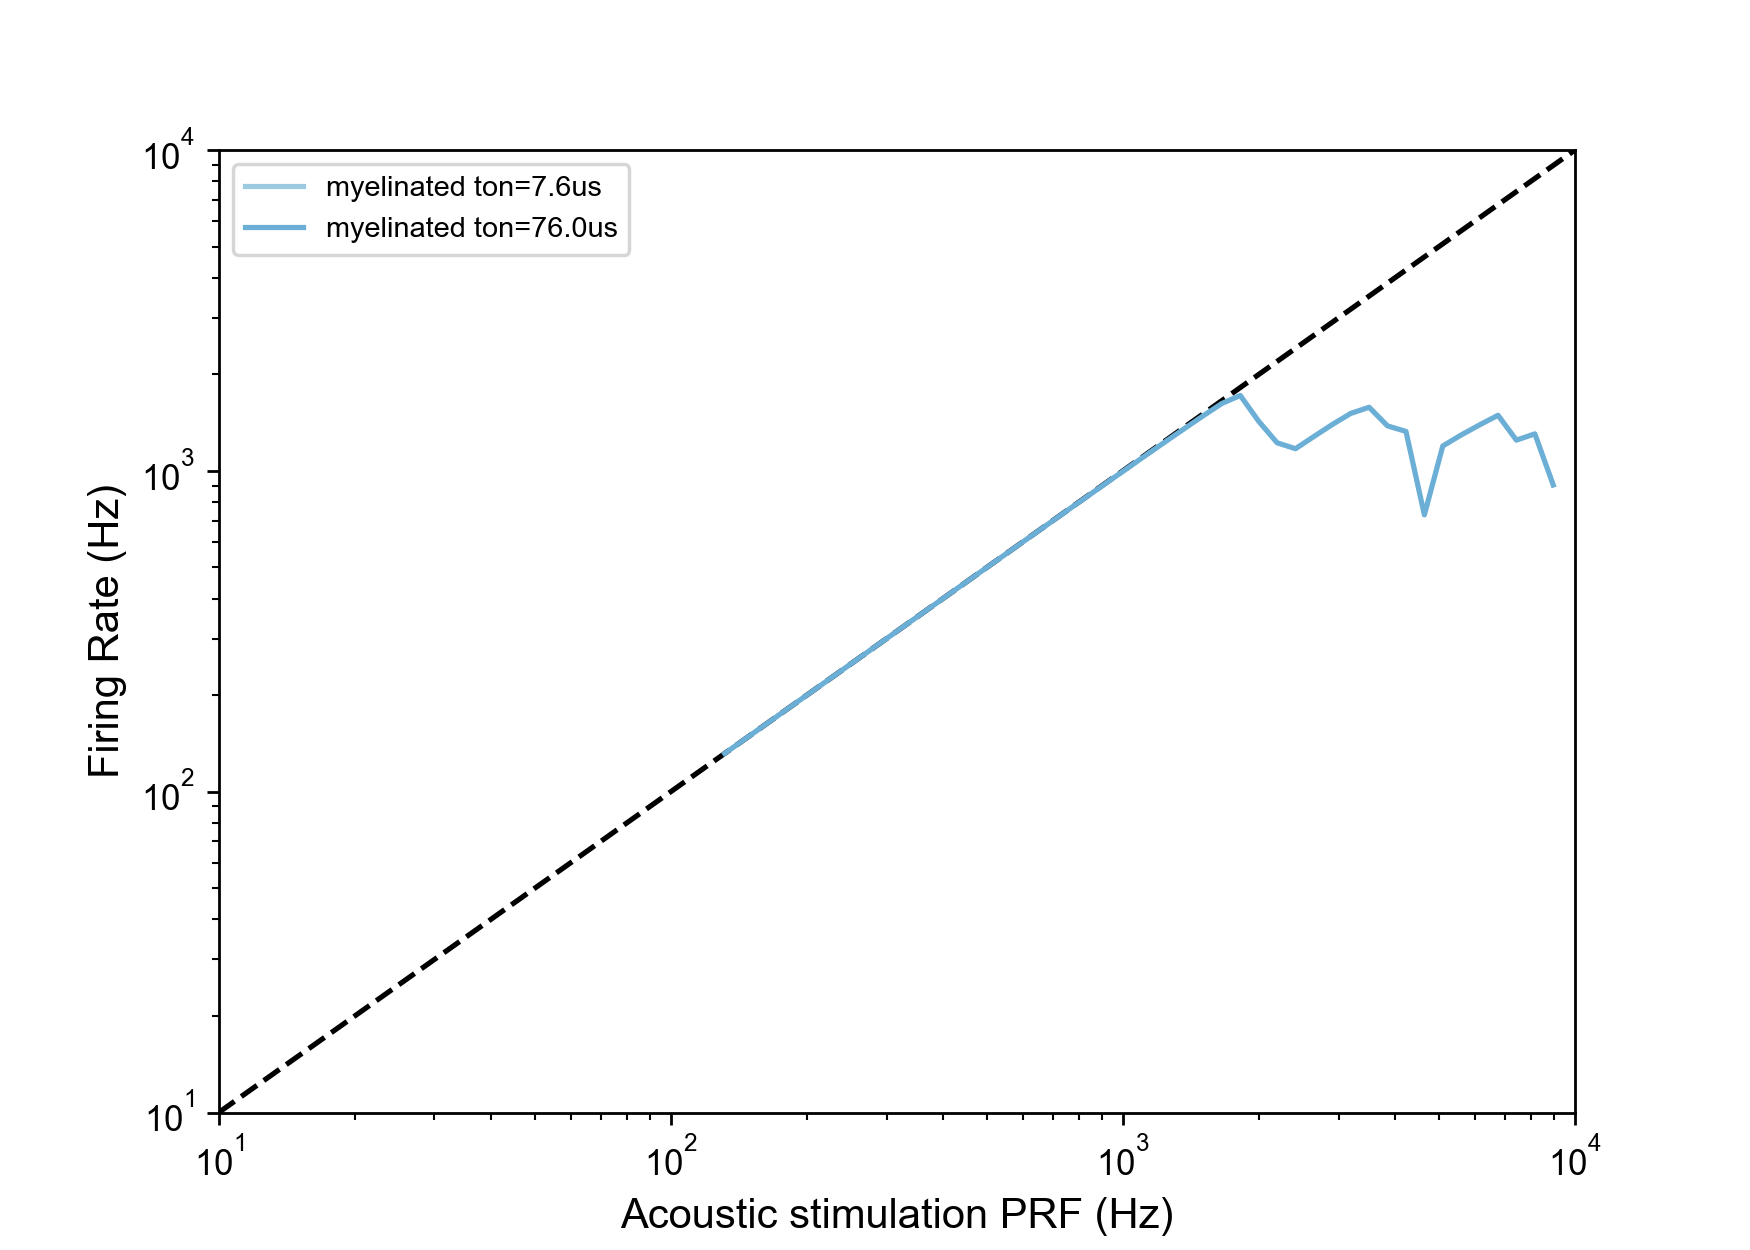

In [21]:
%matplotlib notebook
fig, axes = plt.subplots(figsize=(7,5)) 
axes.set_title(f' ', fontsize=fs)
axes.set_xlabel('Acoustic stimulation PRF (Hz)', fontsize=12)
axes.set_ylabel('Firing Rate (Hz)', fontsize=12)
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]

ton_myel = [76e-7, 76e-6, 76e-5]
prf_max = np.divide(0.99, min(ton_myel))
axes.plot([10, prf_max], [10, prf_max], '--', color='k')
for i, ton in enumerate (ton_myel):
    prf_max = np.divide(0.99,ton)
    prf_min = np.divide(0.01,ton)
    prf = np.logspace(max(1, np.log10(prf_min)), np.log10(prf_max), 50) 
    fr=np.loadtxt(f'FiringRate/fr_myel_ton{(ton*1e6):.1f}us.txt')
    axes.plot(prf, fr, label=f'myelinated ton={(ton*1e6):.1f}us', color=colors[3+i])

ton_unmyel = [8e-4, 8e-3, 8e-2]
for i, ton in enumerate (ton_unmyel):
    prf_max = np.divide(0.99,ton)
    prf_min = np.divide(0.01,ton)
    prf = np.logspace(max(1, np.log10(prf_min)), np.log10(prf_max), 50) 
    fr=np.loadtxt(f'FiringRate/fr_unmyel_ton{(ton*1e3):.1f}ms.txt')
     axes.plot(prf, fr, label=f'unmyelinated ton={(ton*1e3):.1f}ms', color=colors[i])    
    
axes.set_yscale('log')
axes.set_xscale('log')
axes.set_xlim(10, 1e4)
axes.set_ylim(10, 1e4)
axes.legend(fontsize='small')

## Myelinated fiber

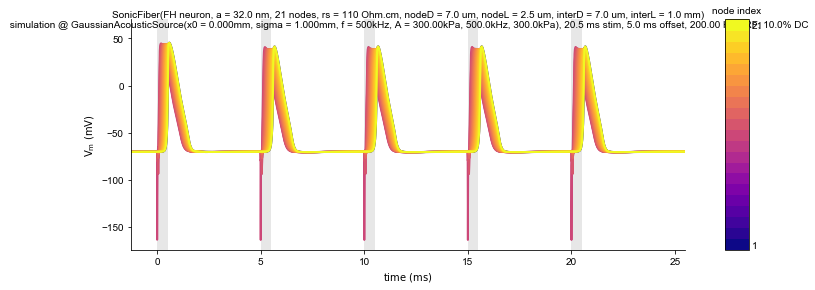

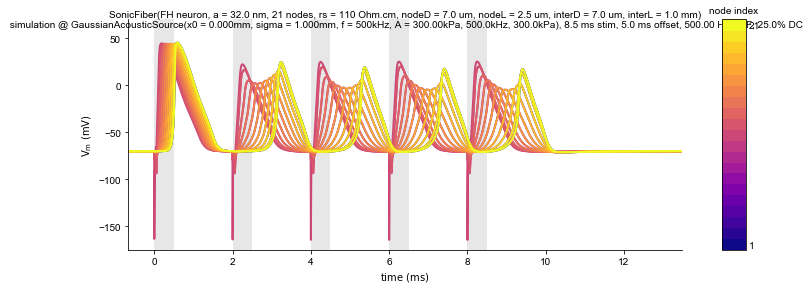

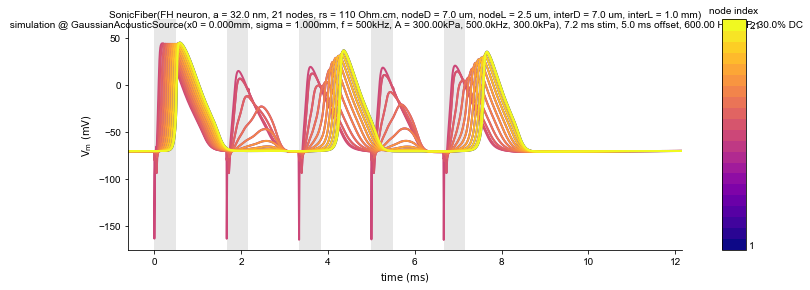

In [8]:
fiberD = 10e-6 
fiber = myelinatedFiberReilly(fiber_class, fiberD)
A = 300e3
source = GaussianAcousticSource(0, sigma, Fdrive, A)
ton = 0.5e-3
toffset = 5e-3
prf_range = [1000, 1700, 2000]

fr = np.zeros(len(prf_range))
for n, prf in enumerate(prf_range):
    toff = 1/prf - ton
    dc = ton * prf   
    tstim = 9 / prf + ton
    pp = PulsedProtocol(tstim, toffset, prf, dc)
    data, meta= fiber.simulate(source, pp)          
    fig = SectionCompTimeSeries([(data, meta)], 'Vm', fiber.ids).render()

### Dependence on stimulation amplitude and duty cycle (PRF = 200, 500, 600 Hz)

In [11]:
fiberD = 10e-6 
nnodes=21
a=32e-9
fs=0.8
fiber = SennFiber(fiberD, nnodes, a=a, fs=fs)
A_range=np.linspace(0, 40e4, 41)   
dc_range=np.linspace(0.001, 1, 41)   
%matplotlib notebook
logger.setLevel(logging.INFO)

In [12]:
prf = 1000
Fdrive=500e3
toffset=3e-3
fr_norm = np.zeros((np.size(A_range), np.size(dc_range)))
for n, A in enumerate (A_range):
    source = GaussianAcousticSource(0, fiber.length / 10., Fdrive, A)
    for i, dc in enumerate (dc_range):
        ton = dc / prf   
        tstim = 9 / prf + ton
        pp = PulsedProtocol(tstim, toffset, prf, dc)
        data, meta= fiber.simulate(source, pp) 
        fr_norm[n,i]= FiringRate(fiber, source, pp, data)/prf
    np.save('fr_myel1000', fr_norm)
    np.savetxt('fr_myel1000.txt', fr_norm)

 21/09/2020 22:47:16: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 9ms, toffset = 3ms, PRF = 1.00kHz, DC = 100.0m%
 21/09/2020 22:47:17: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 9ms, toffset = 3ms, PRF = 1.00kHz, DC = 2.6%
 21/09/2020 22:47:17: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 9ms, toffset = 3ms, PRF = 1.00kHz, DC = 5.1%
 21/09/2020 22:47:17: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 9ms, toffset = 3ms, PRF = 1.00kHz, DC = 7.6%
IDA initialization failure, weighted norm of residual=9.13578
 21/09/2020 22:47:18: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulat

<IPython.core.display.Javascript object>


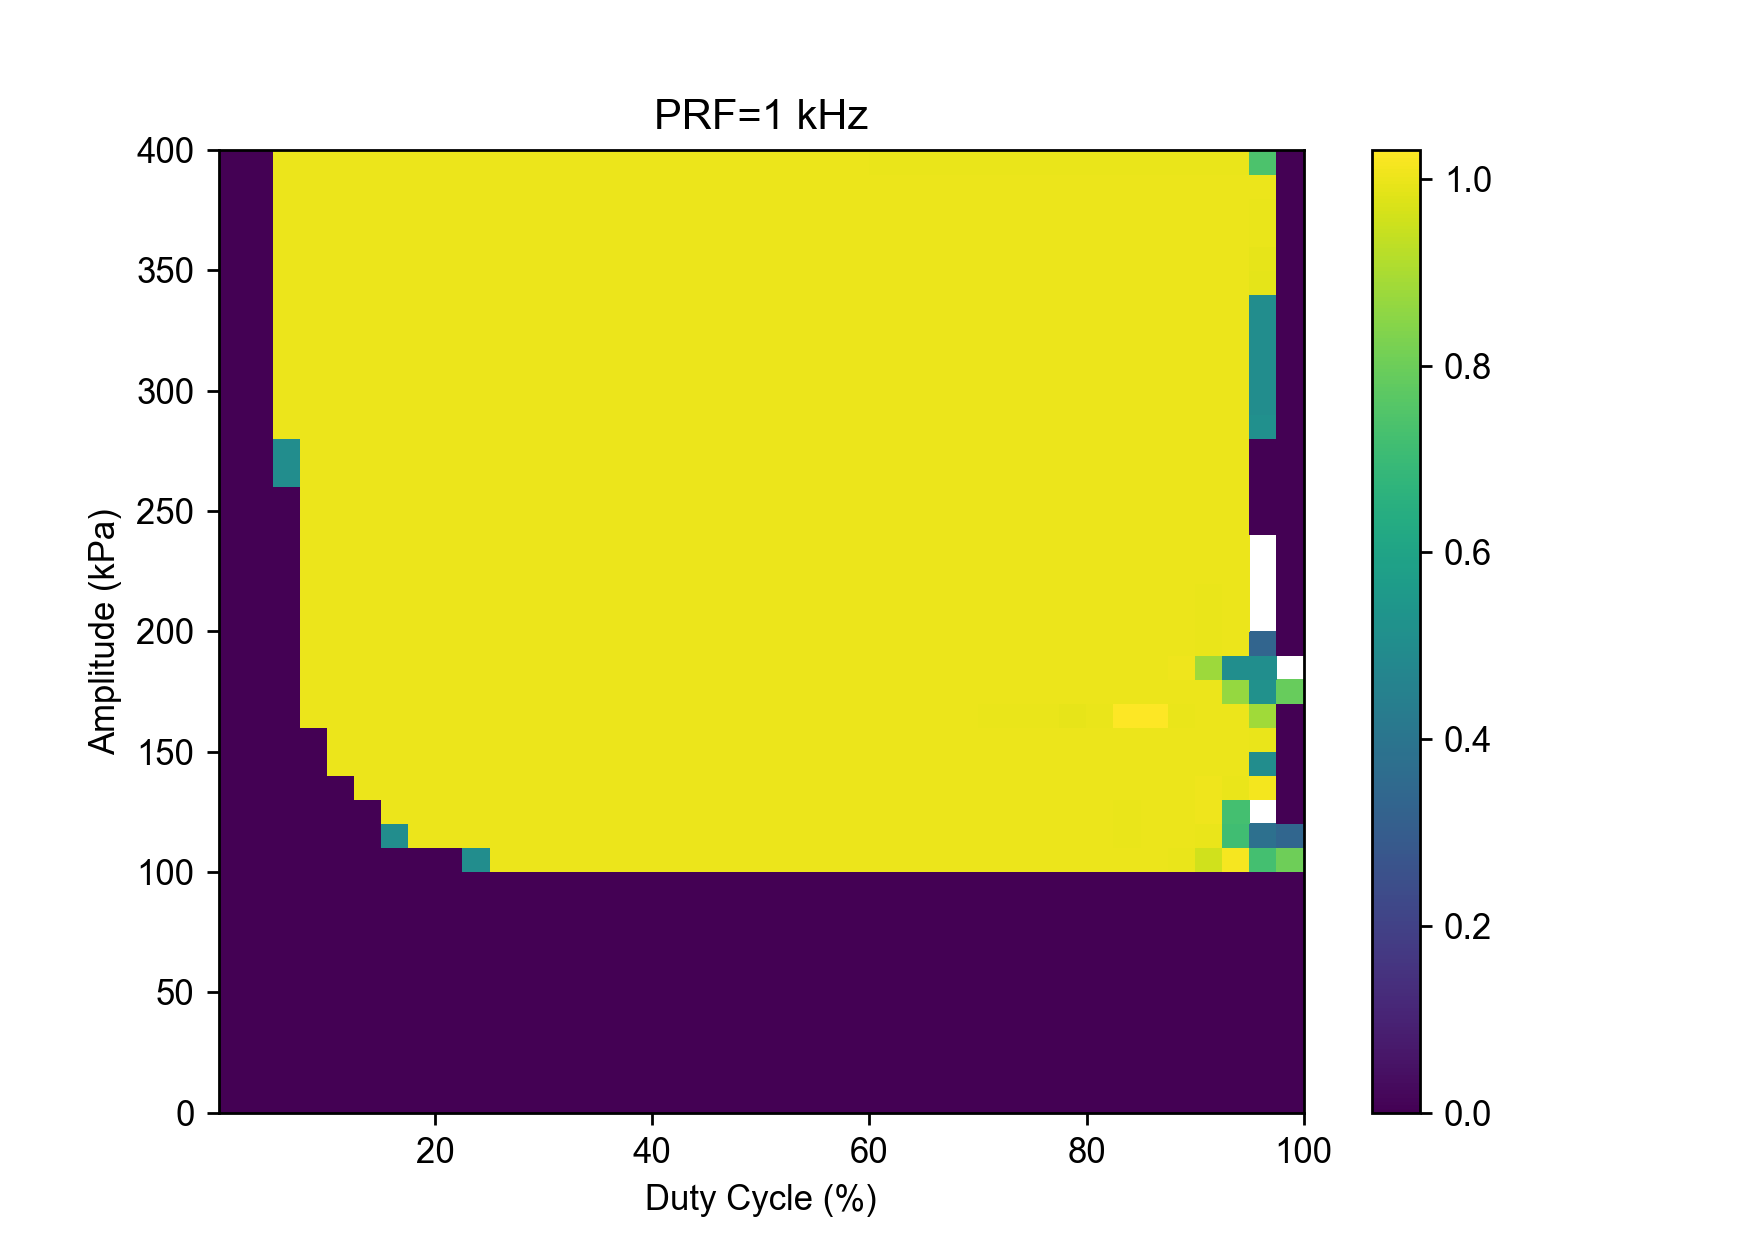

In [13]:
fig, axes = plt.subplots(figsize=(7,5)) 
axes.set_title('PRF=1 kHz', fontsize=12)
axes.set_xlabel('Duty Cycle (%)')
axes.set_ylabel('Amplitude (kPa)')
sm=axes.pcolormesh(dc_range*100, A_range * 1e-3, fr_norm, cmap='viridis', vmin=0, vmax=1)
fig.colorbar(sm)

In [18]:
prf=1800
fr_norm = np.zeros((np.size(A_range), np.size(dc_range)))
for n, A in enumerate (A_range):
    source = GaussianAcousticSource(0, fiber.length / 10., Fdrive, A)
    for i, dc in enumerate (dc_range):
        ton = dc / prf   
        tstim = 9 / prf + ton
        pp = PulsedProtocol(tstim, toffset, prf, dc)
        data, meta= fiber.simulate(source, pp) 
        fr_norm[n,i]= FiringRate(fiber, source, pp, data)/prf 
np.save('fr_myel1700', fr_norm)
np.savetxt('fr_myel1700.txt', fr_norm)

 22/09/2020 09:34:57: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 5ms, toffset = 3ms, PRF = 1.80kHz, DC = 100.0m%
IDA initialization failure, weighted norm of residual=406.748
 22/09/2020 09:34:57: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 5ms, toffset = 3ms, PRF = 1.80kHz, DC = 2.6%
 22/09/2020 09:34:57: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 5ms, toffset = 3ms, PRF = 1.80kHz, DC = 5.1%
IDA initialization failure, weighted norm of residual=1.34181
 22/09/2020 09:34:58: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 5ms, toffset = 3ms, PRF = 1.80kHz, DC = 7.6%
 22/09/2020 09:34:58: Sen

<IPython.core.display.Javascript object>


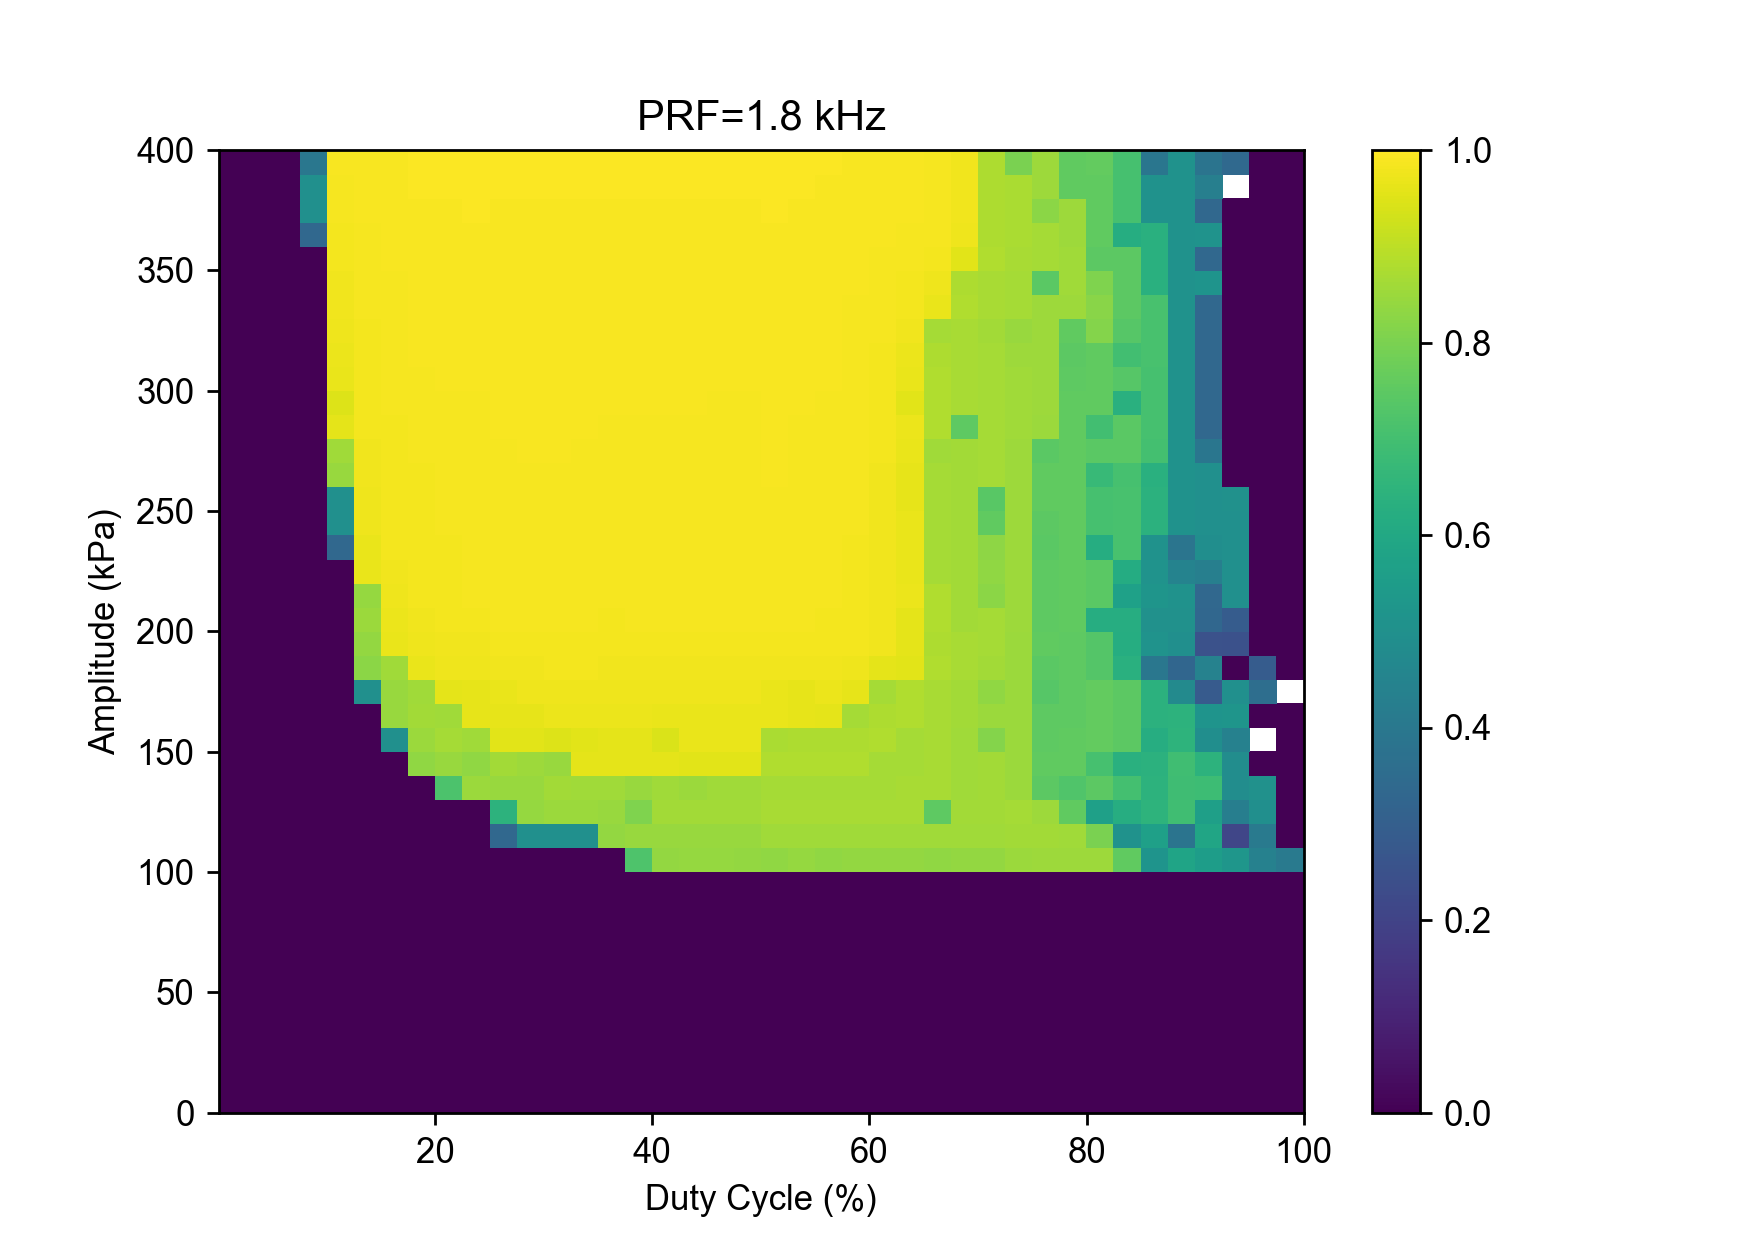

In [19]:
fig, axes = plt.subplots(figsize=(7,5)) 
axes.set_title('PRF=1.8 kHz', fontsize=12)
axes.set_xlabel('Duty Cycle (%)')
axes.set_ylabel('Amplitude (kPa)')
sm=axes.pcolormesh(dc_range*100, A_range * 1e-3, fr_norm, cmap='viridis', vmin=0, vmax=1)
fig.colorbar(sm)

In [16]:
prf=2000
fr_norm = np.zeros((np.size(A_range), np.size(dc_range)))
for n, A in enumerate (A_range):
    source = GaussianAcousticSource(0, fiber.length / 10., Fdrive, A)
    for i, dc in enumerate (dc_range):
        ton = dc / prf   
        tstim = 9 / prf + ton
        pp = PulsedProtocol(tstim, toffset, prf, dc)
        data, meta= fiber.simulate(source, pp) 
        fr_norm[n,i]= FiringRate(fiber, source, pp, data)/prf
np.save('fr_myel1700', fr_norm)
np.savetxt('fr_myel1700.txt', fr_norm)

 22/09/2020 07:57:52: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 5ms, toffset = 3ms, PRF = 2.00kHz, DC = 100.0m%
IDA initialization failure, weighted norm of residual=412.958
 22/09/2020 07:57:52: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 5ms, toffset = 3ms, PRF = 2.00kHz, DC = 2.6%
IDA initialization failure, weighted norm of residual=24.3616
 22/09/2020 07:57:53: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 5ms, toffset = 3ms, PRF = 2.00kHz, DC = 5.1%
IDA initialization failure, weighted norm of residual=24.4615
 22/09/2020 07:57:53: SennFiber(fiberD = 10.0 um, 21 nodes, a=32.0 nm, fs=80%): simulation @ GaussianAcousticSource(x0=0.0m, sigma=2.0mm, f=500kHz, A=0.00Pa), tstim = 5ms, tof

<IPython.core.display.Javascript object>


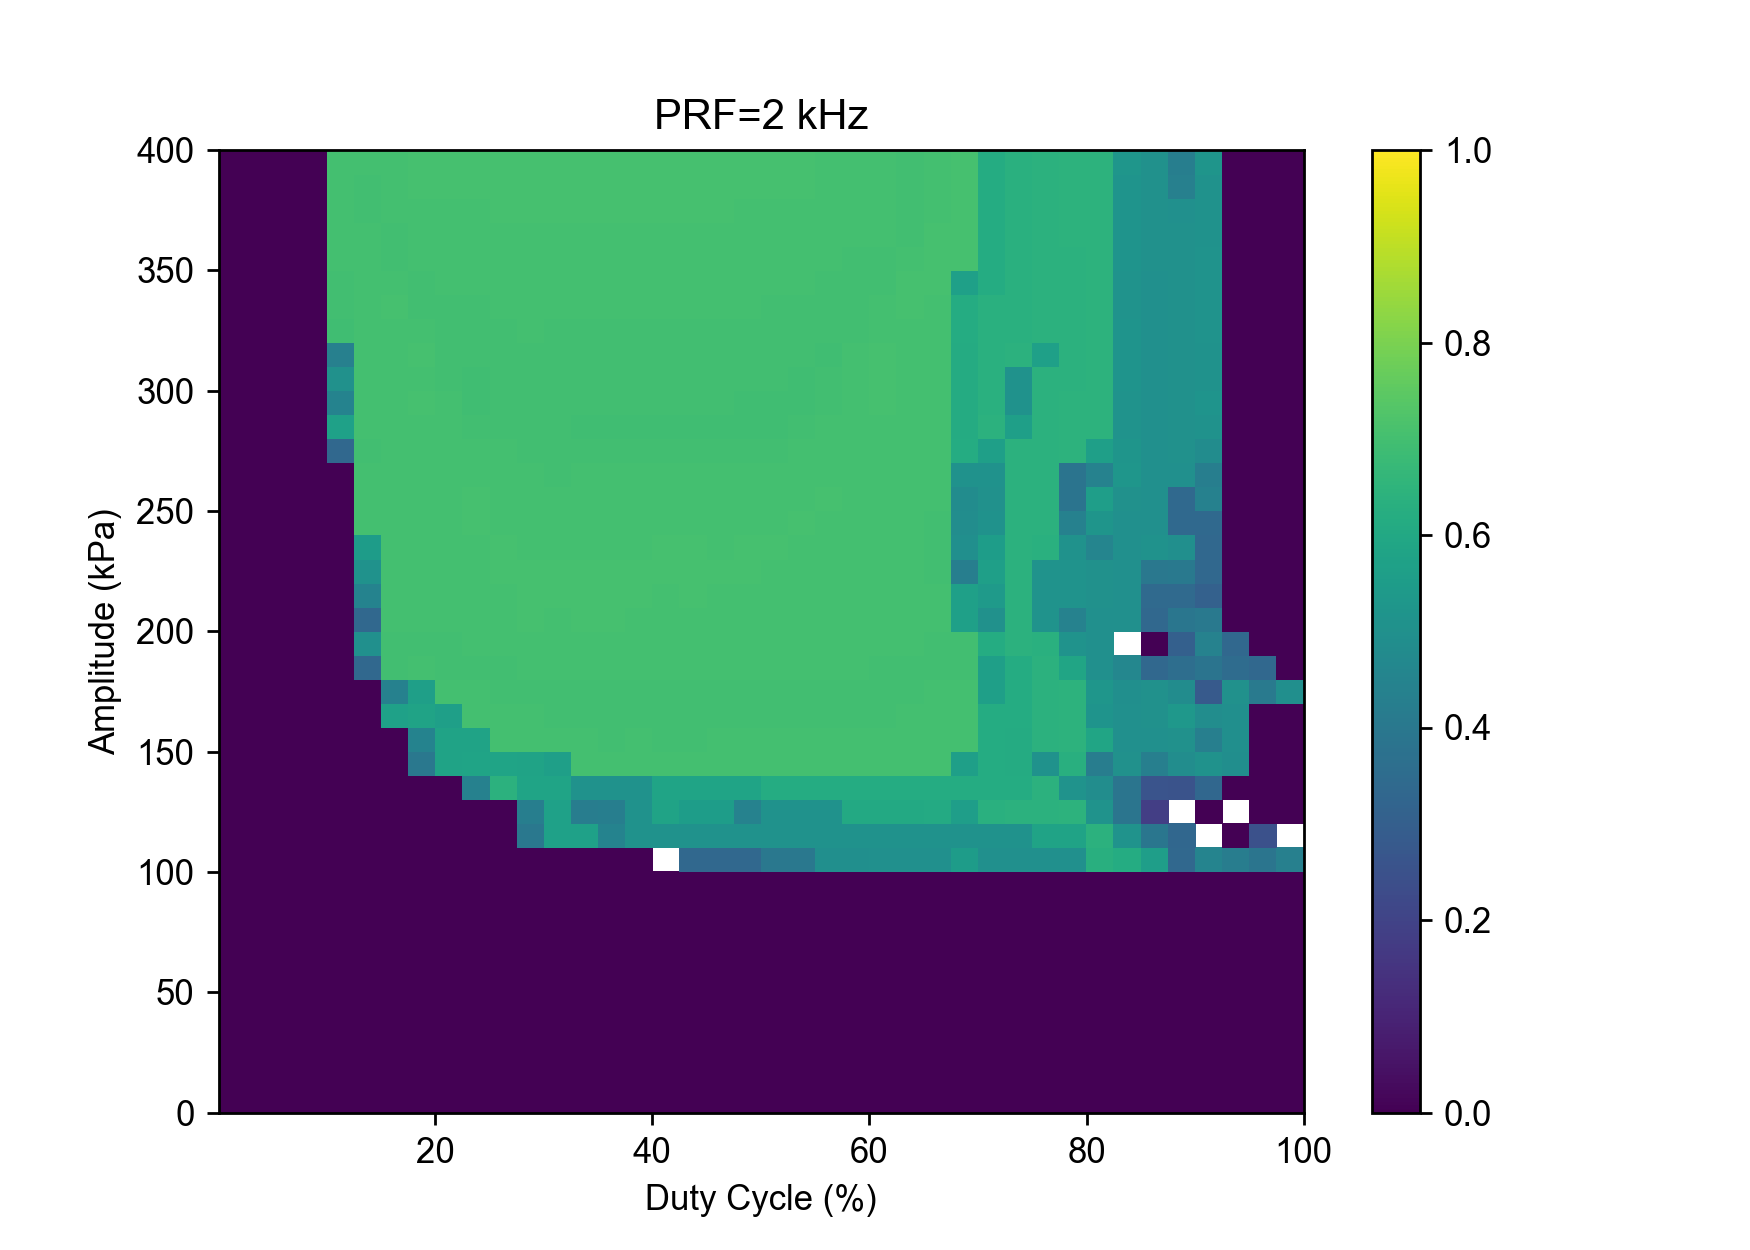

In [17]:
fig, axes = plt.subplots(figsize=(7,5)) 
axes.set_title('PRF=2 kHz', fontsize=12)
axes.set_xlabel('Duty Cycle (%)')
axes.set_ylabel('Amplitude (kPa)')
sm=axes.pcolormesh(dc_range*100, A_range * 1e-3, fr_norm, cmap='viridis', vmin=0, vmax=1)
fig.colorbar(sm)

## Unmyelinated fibers 

In [3]:
# Gaussian acoustic stimulation
Fdrive = 500e3
sigma = 1e-3
toffset = 10e-3  
fiber_class = SonicFiber

### Dependence on PRF

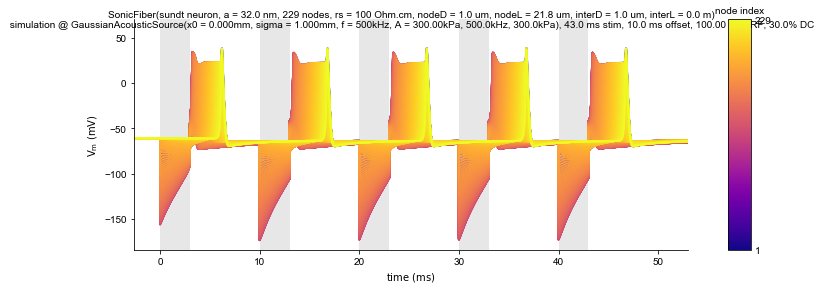

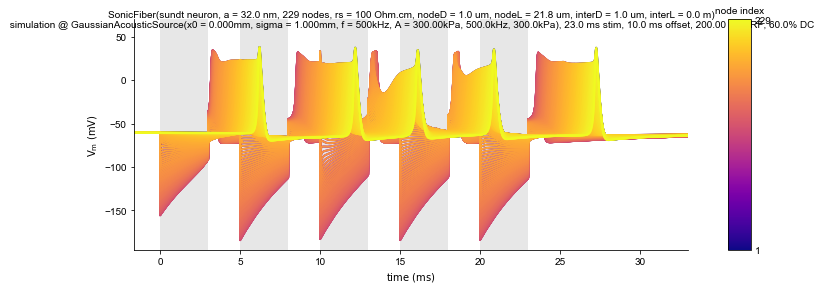

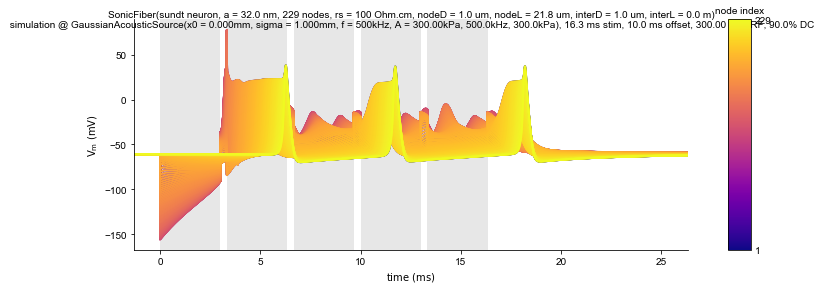

In [4]:
fiberD = 1e-6 
fiber = unmyelinatedFiberSundt(fiber_class, fiberD)
A = 30e4
source = GaussianAcousticSource(0, sigma, Fdrive, A)
ton = 3e-3
toffset = 10e-3 
prf_range = [100, 200, 300]

fr = np.zeros(len(prf_range))
for n, prf in enumerate(prf_range):
    toff = 1/prf - ton
    dc = ton * prf   
    tstim = 4 / prf + ton
    pp = PulsedProtocol(tstim, toffset, prf, dc)
    data, meta= fiber.simulate(source, pp)          
    fig = SectionCompTimeSeries([(data, meta)], 'Vm', fiber.ids).render()

### Dependence on stimulation amplitude and duty cycle (PRF = 100, 200, 300 Hz)

In [17]:
fiberD = 1e-6 
fiber = unmyelinatedFiberSundt(fiber_class, fiberD)
A_range=np.linspace(0, 40e4, 41)
dc_range=np.linspace(0, 1, 41)
%matplotlib notebook

In [18]:
prf=100
fr_norm_un100 = np.zeros((np.size(A_range), np.size(dc_range)))
for n, A in enumerate (A_range):
    source = GaussianAcousticSource(0, sigma, Fdrive, A)
    for i, dc in enumerate (dc_range):
        ton = dc / prf   
        tstim =  9/ prf + ton
        pp = PulsedProtocol(tstim, toffset, prf, dc)
        fr_norm_un100[n,i]= FiringRate(fiber, source, pp)/prf 
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


[[0.267004 0.004874 0.329415 1.      ]
 [0.26851  0.009605 0.335427 1.      ]
 [0.269944 0.014625 0.341379 1.      ]
 ...
 [0.974417 0.90359  0.130215 1.      ]
 [0.983868 0.904867 0.136897 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


<IPython.core.display.Javascript object>


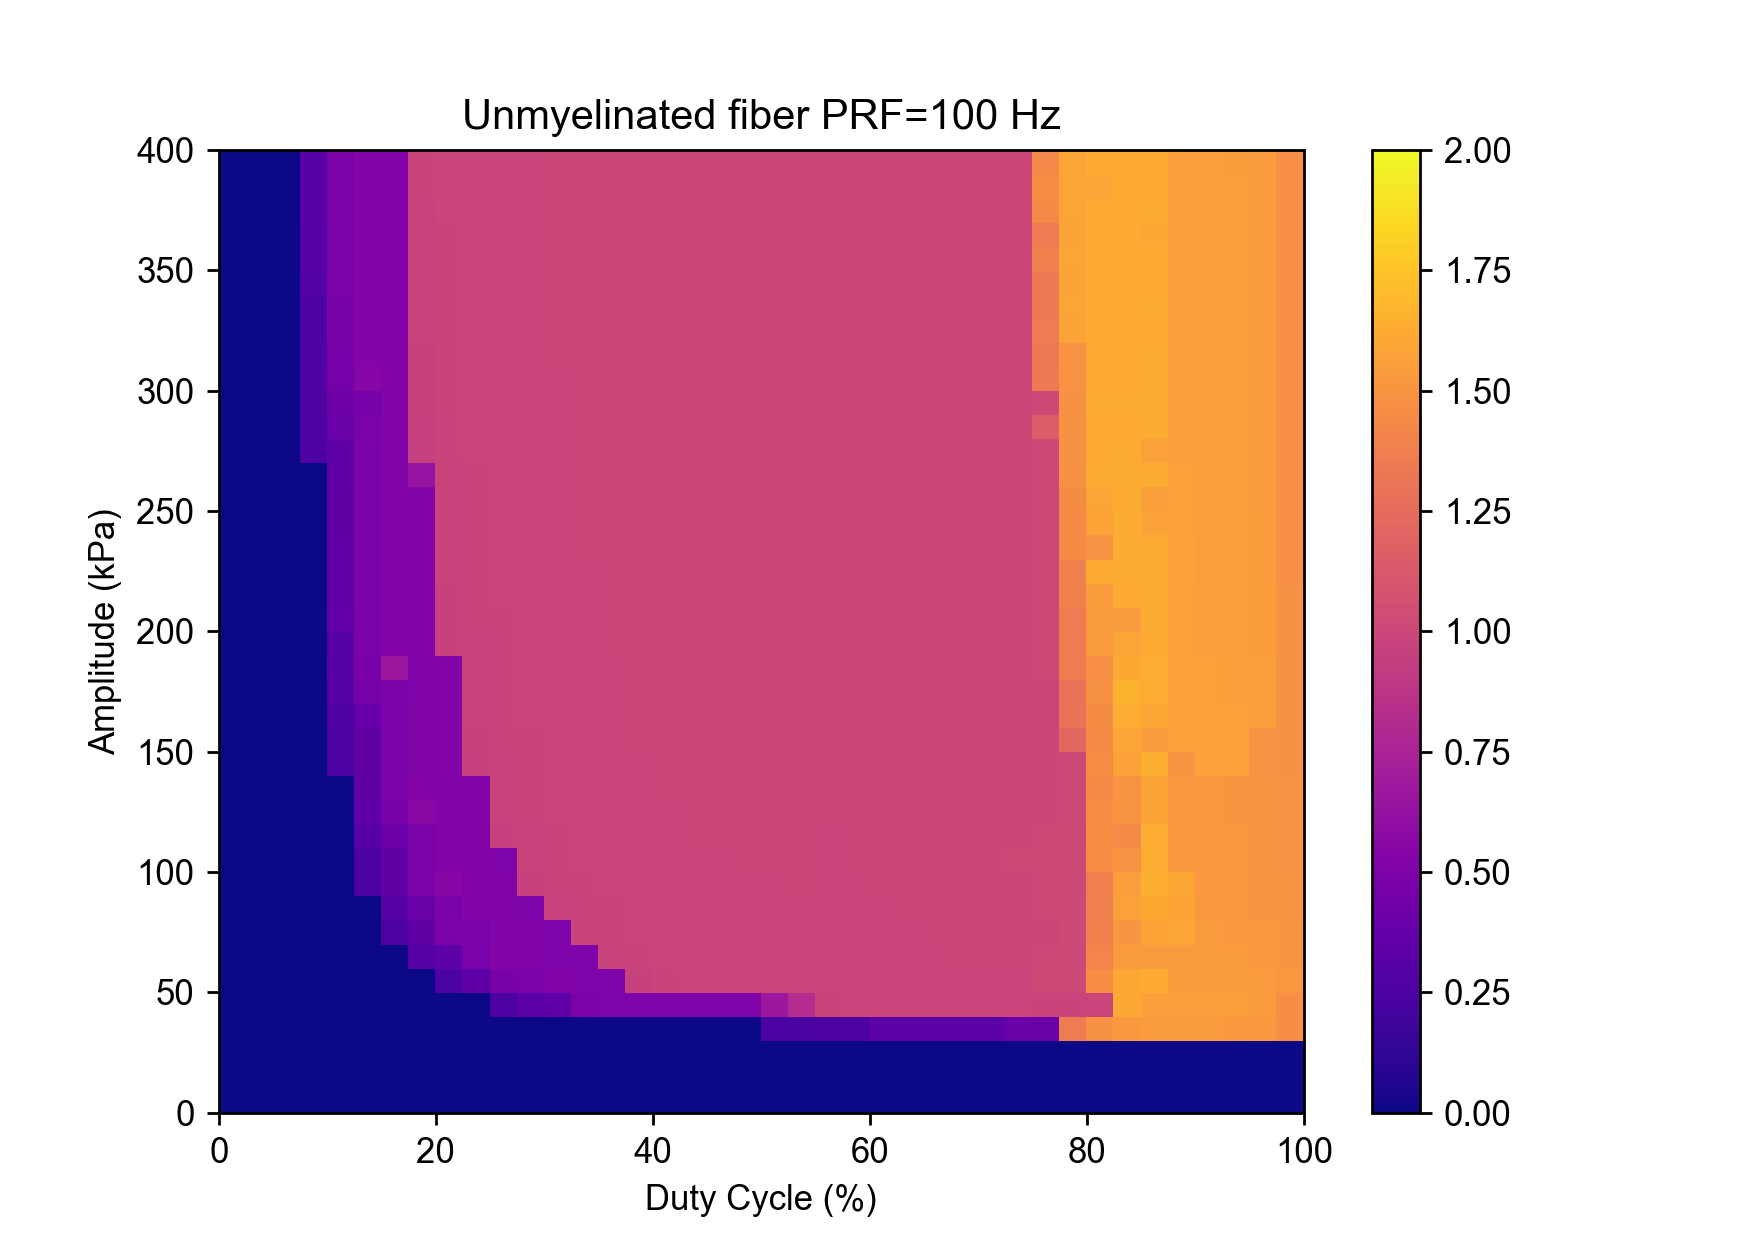

In [19]:
import matplotlib.colors as mcolors
colors1 = plt.get_cmap('viridis')
colors2 = plt.get_cmap('plasma')
newcmp1=colors1(np.linspace(0, 1, 256))
newcmp2 = mcolors.ListedColormap(colors2(np.linspace(0, 0.5, 128)))
print(newcmp1)
#colors1 = plt.cm.binary(np.linspace(0., 1, 128))
#colors2 = plt.cm.gist_heat_r(np.linspace(0, 1, 128))

#colors = np.vstack((newcmp1, newcmp2))
#mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

fig, axes = plt.subplots(figsize=(7,5)) 
axes.set_title('Unmyelinated fiber PRF=100 Hz', fontsize=12)
axes.set_xlabel('Duty Cycle (%)')
axes.set_ylabel('Amplitude (kPa)')
sm=axes.pcolormesh(dc_range*100, A_range * 1e-3, fr_norm_un100, cmap='plasma', vmin=0, vmax=2)
#sm=axes.pcolormesh(dc_range*100, A_range * 1e-3, fr_norm_un100, cmap='plasma', vmin=0, vmax=2) #vmin=0, vmax=1
fig.colorbar(sm)

In [22]:
prf=200
fr_norm_un200 = np.zeros((np.size(A_range), np.size(dc_range)))
for n, A in enumerate (A_range):
    source = GaussianAcousticSource(0, sigma, Fdrive, A)
    for i, dc in enumerate (dc_range):
        ton = dc / prf   
        tstim = 10 / prf + ton
        pp = PulsedProtocol(tstim, toffset, prf, dc)
        fr_norm_un200[n,i]= FiringRate(fiber, source, pp)/prf 
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


<IPython.core.display.Javascript object>


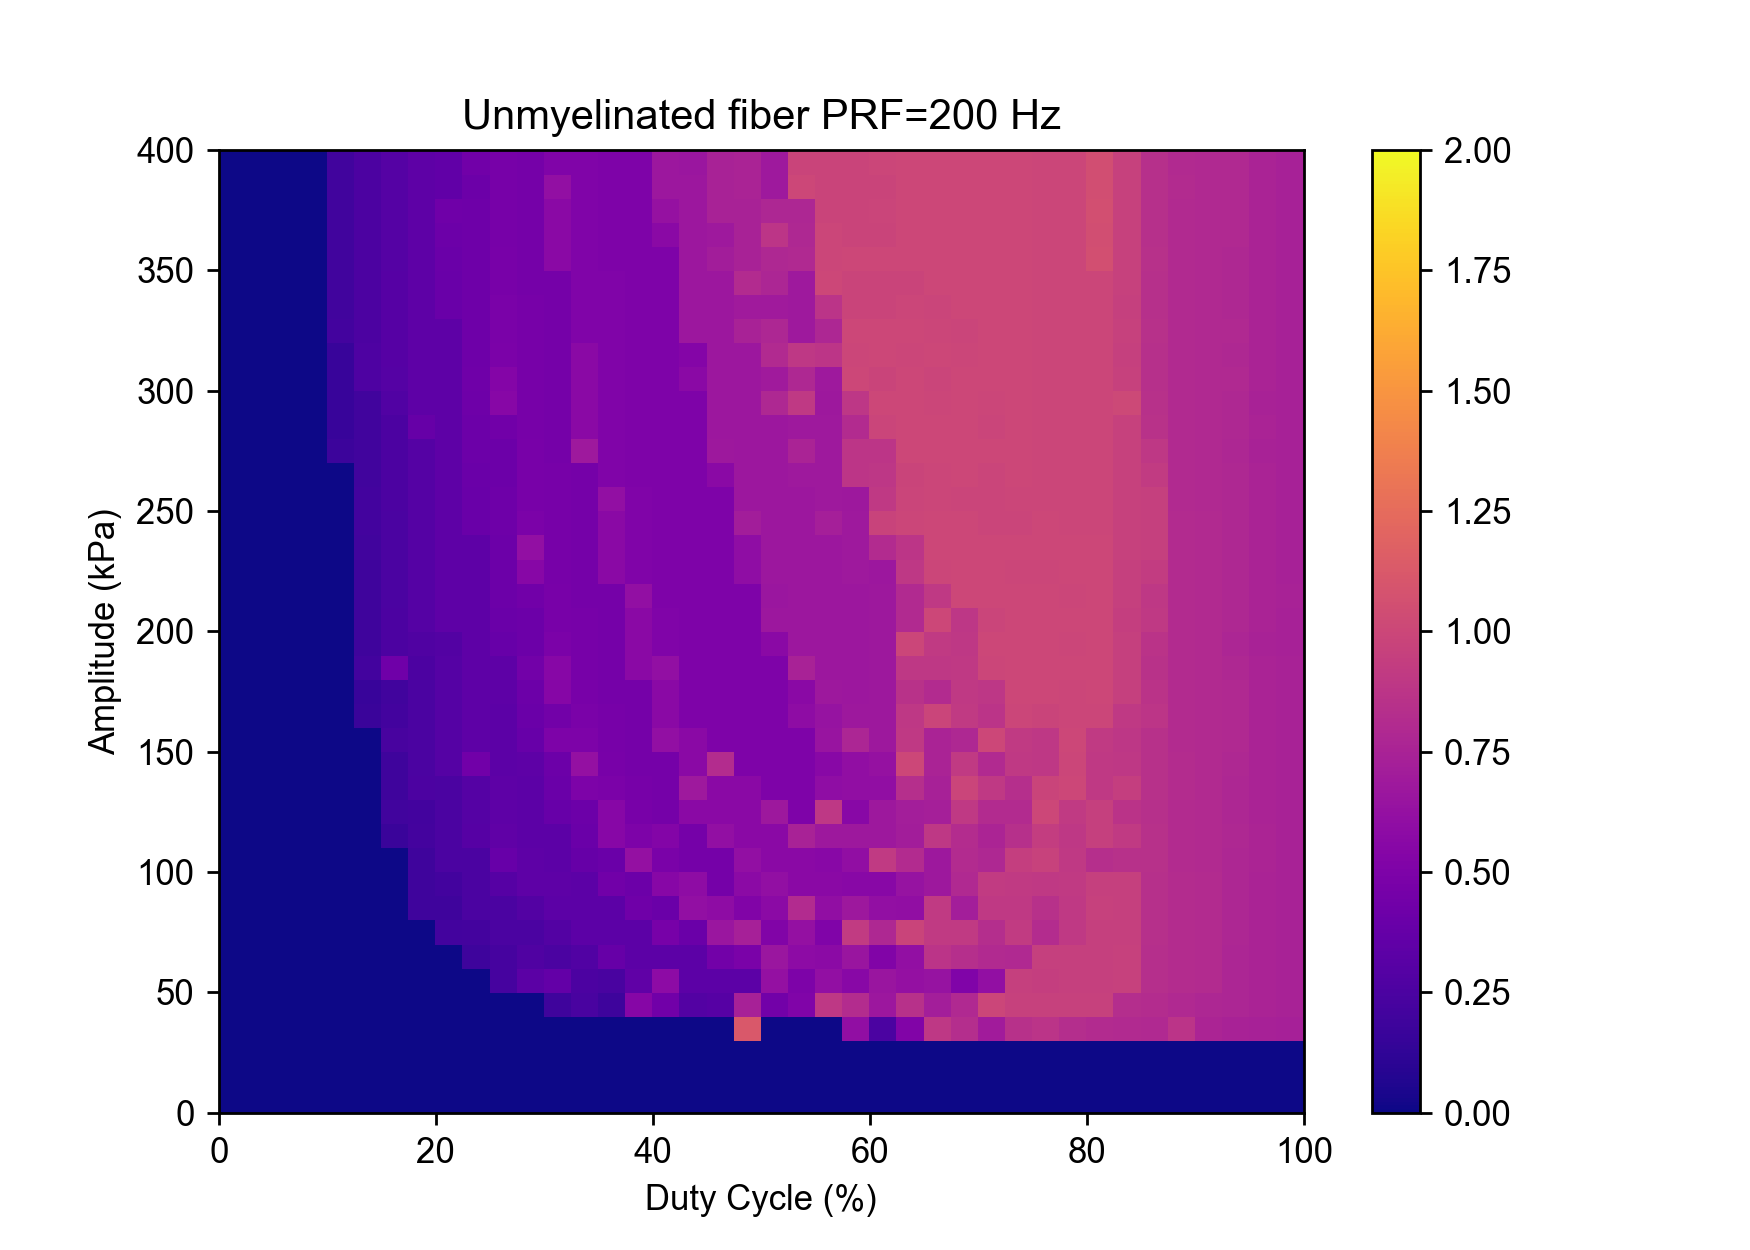

In [23]:
fig, axes = plt.subplots(figsize=(7,5)) 
axes.set_title('Unmyelinated fiber PRF=200 Hz', fontsize=12)
axes.set_xlabel('Duty Cycle (%)')
axes.set_ylabel('Amplitude (kPa)')
sm=axes.pcolormesh(dc_range*100, A_range * 1e-3, fr_norm_un200, cmap='plasma', vmin=0, vmax=2) #vmin=0, vmax=1
fig.colorbar(sm)

In [24]:
prf=300
fr_norm_un300 = np.zeros((np.size(A_range), np.size(dc_range)))
for n, A in enumerate (A_range):
    source = GaussianAcousticSource(0, sigma, Fdrive, A)
    for i, dc in enumerate (dc_range):
        ton = dc / prf   
        tstim = 8 / prf + ton
        pp = PulsedProtocol(tstim, toffset, prf, dc)
        fr_norm_un300[n,i]= FiringRate(fiber, source, pp)/prf 
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


<IPython.core.display.Javascript object>


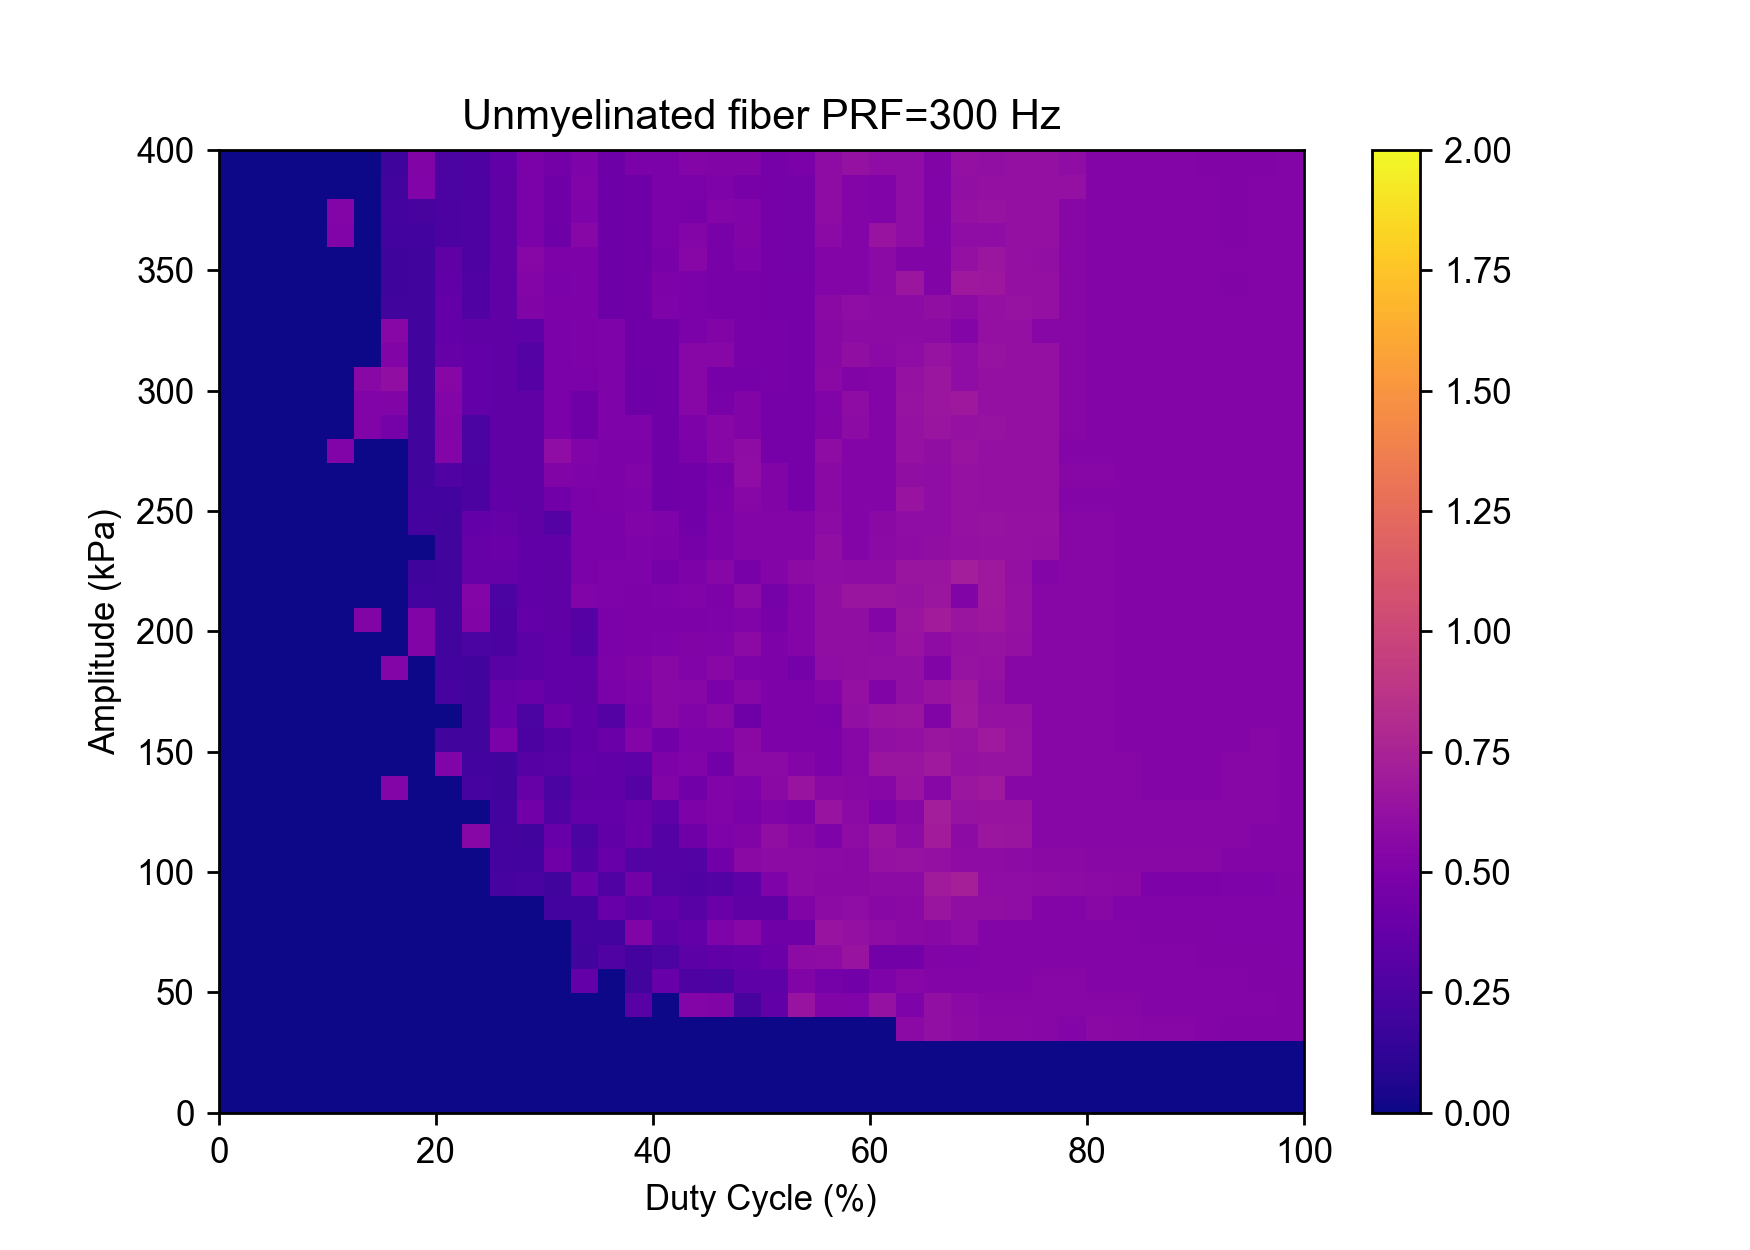

In [25]:
fig, axes = plt.subplots(figsize=(7,5)) 
axes.set_title('Unmyelinated fiber PRF=300 Hz', fontsize=12)
axes.set_xlabel('Duty Cycle (%)')
axes.set_ylabel('Amplitude (kPa)')
sm=axes.pcolormesh(dc_range*100, A_range * 1e-3, fr_norm_un300, cmap='plasma', vmin=0, vmax=2) #vmin=0, vmax=1
fig.colorbar(sm)